In [5]:
pwd

'c:\\Users\\ajith\\Downloads\\projects\\news-recommender-mlops\\news-recommender-mlops\\notebooks'

In [12]:
import pandas as pd
import json

In [13]:
with open("../data/processed/user_history.json", "r", encoding="utf-8") as f:
    user_history=json.load(f)


In [55]:
news_data = pd.read_csv("../data/processed/news.csv")
# remove space
news_data['category'] = news_data['category'].apply(lambda x: np.nan if str(x).strip() == "" else x)

news_data = news_data[news_data['entities'].astype(str).str.strip() != "[]"]

# data cleaning
news_data = news_data.dropna()
news_data = news_data.reset_index(drop=True)
news_data.head()

,news_id,category,subcategory,title,abstract,entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{'Label': 'Prince Philip, Duke of Edinburgh',..."
1,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...","[{'Label': 'Skin tag', 'Type': 'C', 'WikidataI..."
2,N2073,sports,football_nfl,Should NFL be able to fine players for critici...,Several fines came down against NFL players fo...,"[{'Label': 'National Football League', 'Type':..."
3,N11429,news,newsscienceandtechnology,"How to record your screen on Windows, macOS, i...",The easiest way to record what's happening on ...,"[{'Label': 'Microsoft Windows', 'Type': 'J', '..."
4,N49186,weather,weathertopstories,It's been Orlando's hottest October ever so fa...,There won't be a chill down to your bones this...,"[{'Label': 'Orlando, Florida', 'Type': 'G', 'W..."


C:\Users\ajith\AppData\Local\Temp\ipykernel_34124\1248963699.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


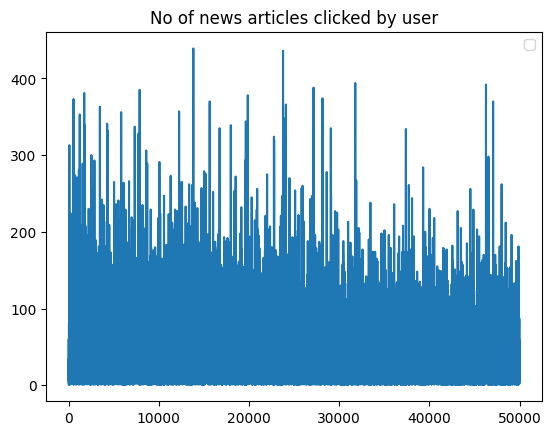

In [56]:
import matplotlib.pyplot as plt
count=[]
for i in user_history.keys():
    count.append(len(user_history[i]))
plt.plot(count)
plt.title("No of news articles clicked by user")
plt.legend()

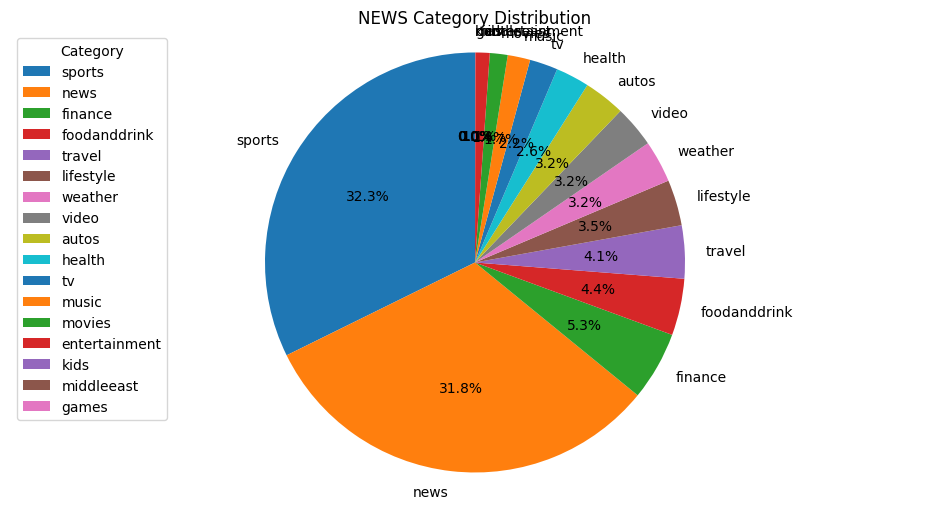

In [59]:
# pie chart
category_counts = news_data["category"].value_counts()
plt.figure(figsize=(12, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("NEWS Category Distribution")
plt.legend(title="Category", loc="best")
plt.axis("equal")
plt.show()

In [61]:
news_data.to_csv("cleaned_data.csv", index=False)